In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
freq = 1e4
amp = 0.1
noise_level = 0.7
t = np.arange(0, 1, 1e-4) * 1e-2
y = amp * np.sin(2 * np.pi * freq * t) + noise_level * np.random.randn(t.size)
df = pd.DataFrame({'time': t, 'value': y})

ref_y = np.sin(2 * np.pi * freq * t + np.pi/4)
df['ref_value'] = ref_y

multiplied_signal = df['value'] * df['ref_value']
df['multiplied_signal'] = multiplied_signal

fft_vals = np.fft.rfft(df["multiplied_signal"])
freqs = np.fft.rfftfreq(len(t), d=np.diff(t).mean())

cutoff = 50  # Hz
fft_vals[freqs > cutoff] = 0
filtered_signal = np.fft.irfft(fft_vals, n=len(t))

df["filtered"] = filtered_signal

print(np.mean(df["filtered"]) * 2)  # Should be close to amp


0.07396026786540962


Text(0, 0.5, 'Magnitude')

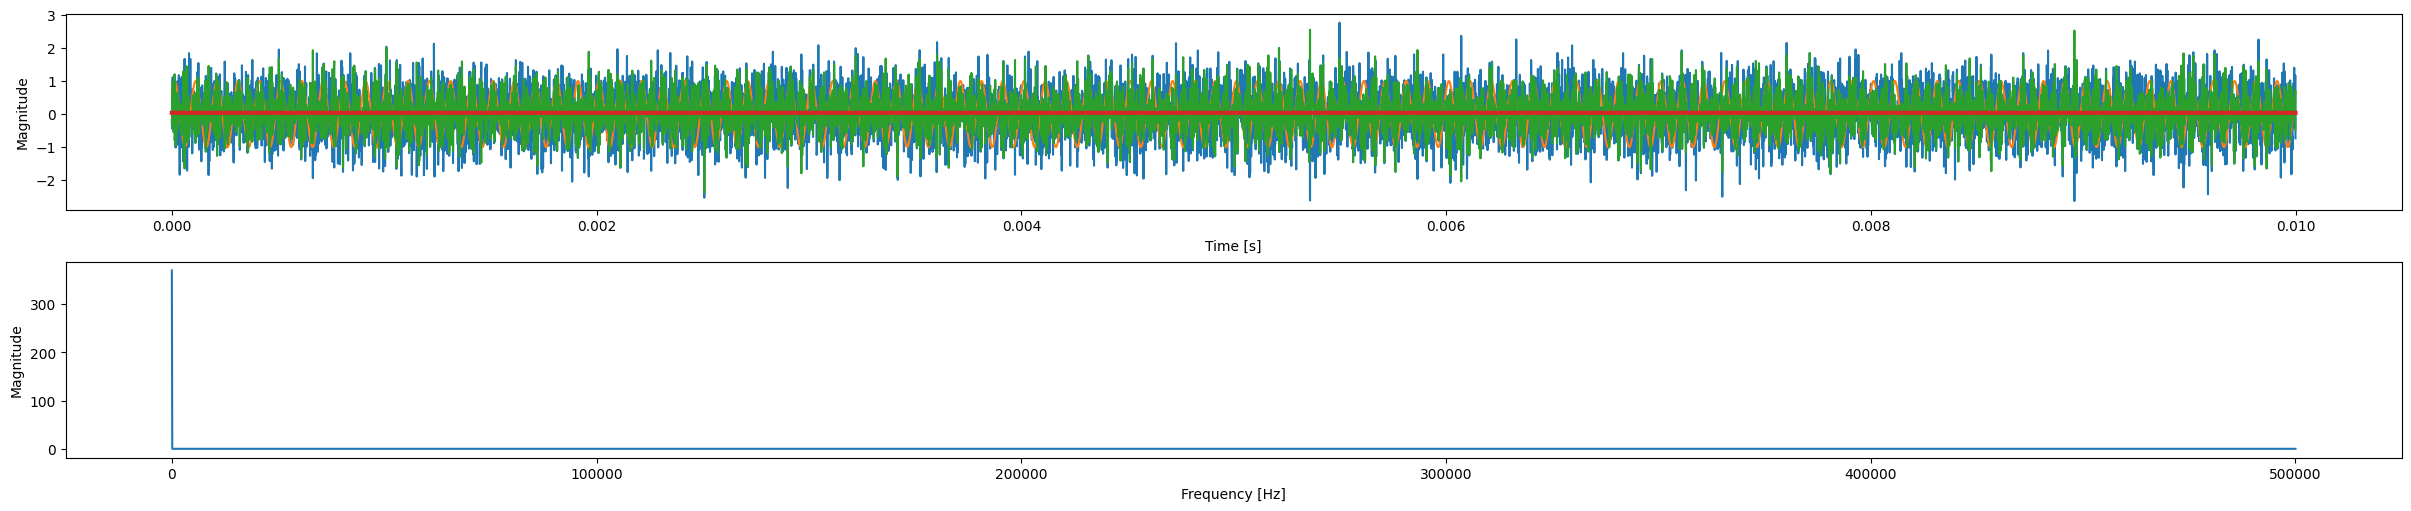

In [53]:
fig, ax = plt.subplots(2, figsize=(24, 5), layout='constrained')
ax[0].plot(df['time'], df['value'])
ax[0].plot(df['time'], df['ref_value'])
ax[0].plot(df['time'], df['multiplied_signal'])
ax[0].plot(df['time'], df['filtered'], linewidth=3)
ax[1].plot(freqs, np.abs(fft_vals))
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Magnitude')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Magnitude')

In [54]:
from bokeh.plotting import figure, show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

# Para Jupyter
output_notebook()

# FFT de la señal multiplicada
fft_vals = np.fft.rfft(df["multiplied_signal"])
freqs = np.fft.rfftfreq(len(t), d=np.diff(t).mean())
magnitude = np.abs(fft_vals)

# ColumnDataSource para el tiempo
source_time = ColumnDataSource(df)

# ColumnDataSource para la FFT
source_fft = ColumnDataSource(data=dict(freq=freqs, magnitude=magnitude))

# Figura del dominio del tiempo
p_time = figure(width=1200, height=350,
                title="Señales en el tiempo",
                x_axis_label="Time [s]", y_axis_label="Value")

p_time.line('time', 'value', source=source_time, color="blue", legend_label="value", line_alpha=0.6)
p_time.line('time', 'ref_value', source=source_time, color="green", legend_label="ref_value", line_alpha=0.6)
p_time.line('time', 'multiplied_signal', source=source_time, color="orange", legend_label="multiplied", line_alpha=0.6)
p_time.line('time', 'filtered', source=source_time, color="red", legend_label="filtered", line_width=3)

p_time.legend.location = "top_left"
p_time.legend.click_policy = "hide"
p_time.toolbar.autohide = True

# Figura del dominio de la frecuencia
p_fft = figure(width=1200, height=300,
               title="Espectro de frecuencia (FFT de multiplied_signal)",
               x_axis_label="Frequency [Hz]", y_axis_label="Magnitude")

p_fft.line('freq', 'magnitude', source=source_fft, line_color="purple")

# Layout combinado
show(column(p_time, p_fft))



Loading BokehJS ...